In [3]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data
from datetime import datetime

yf.pdr_override() #以pandasreader常用的格式覆寫

target_stock = 'TSLA'  #股票代號變數

start_date = datetime(2016, 1, 1)
today = datetime.today().date() # Get today's date
end_date = datetime(today.year, today.month, today.day) # Set the end date in the specified format

df = data.get_data_yahoo([target_stock], start_date, end_date) #將資料放到Dataframe裡面
df = df.drop(df.columns[[0, 1, 2, 4]], axis=1) #keep only "Date", "Close", "Volume"

filename = f'./my_data/{target_stock}_raw.csv' #以股票名稱命名檔案，放在data資料夾下面

df.to_csv(filename) #將df轉成CSV保存

/Users/samuel2001/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%***********************]  1 of 1 completed


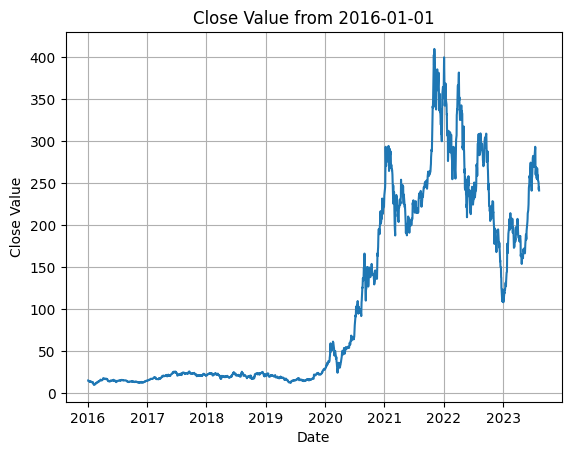

In [4]:
#visualize
import pandas as pd #引入pandas讀取股價歷史資料CSV檔
import matplotlib.pyplot as plt #for plot

# stock = 'TSLA'
stock = target_stock
df = pd.read_csv(f"my_data/{stock}_raw.csv", index_col=0) #pandas讀取資料，並將第1欄作為索引欄
df = df.interpolate() #CSV檔案中若有缺漏，會使用內插法自動補值，不一定需要的功能
df.index = pd.to_datetime(df.index) #將索引欄資料轉換成pandas的時間格式，backtesting才有辦法排序

# Plotting the line chart
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title(f'Close Value from {start_date.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

In [5]:
#get P/E ratio
target_stock = 'TSLA'
stock_data = yf.Ticker(target_stock)

pe_ratio = stock_data.info['trailingPE']

print(f"The PE ratio for {target_stock} is: {pe_ratio}")



The PE ratio for TSLA is: 78.347404


In [30]:
#cannot get pe ratio or earning
ticker_symbol = "TSLA"  # Change this to the desired ticker symbol

data = yf.download(ticker_symbol, start="2020-01-01", end=pd.Timestamp.today())

close_price = data["Close"]
# pe_ratio = data["Close"] / data["trailingEps"]
# PE_ratio = data["trailingPE"]
volume = data["Volume"]

df = pd.DataFrame({"Close Price": close_price, "P/E Ratio": pe_ratio, "Volume": volume})
df

[*********************100%***********************]  1 of 1 completed


,Close Price,P/E Ratio,Volume
Date,,,
2020-01-02,28.684000,78.347404,142981500
2020-01-03,29.534000,78.347404,266677500
2020-01-06,30.102667,78.347404,151995000
2020-01-07,31.270666,78.347404,268231500
2020-01-08,32.809334,78.347404,467164500
...,...,...,...
2023-08-07,251.449997,78.347404,111097900
2023-08-08,249.699997,78.347404,96642200
2023-08-09,242.190002,78.347404,101596300


In [29]:
#0050.TW
stock_token = yf.Ticker("TSLA")
# stock_token.info
stock_token.actions

,Dividends,Stock Splits
Date,,
2020-08-31 00:00:00-04:00,0.0,5.0
2022-08-25 00:00:00-04:00,0.0,3.0
